# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

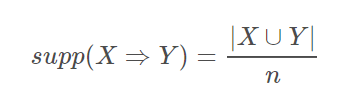

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

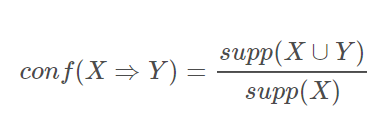

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
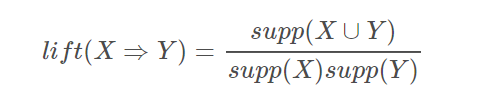



---



# **Bakery Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data BreadBasket_DMS.csv yang bisa temen-temen download [disini](https://drive.google.com/file/d/1Ox_FWaBOnak2yZx5RXT0pOmlDGQjVgTp/view?usp=sharing)

Sekarang import data ke DataFrame dengan library pandas.

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSy5k6GGPux1W17iUSpRe1Sp1Fo1Lj1cIu6tPwkC0rcq5rZZPVSecMhkW1uCAOcX-b5BspShFad5Cu1/pub?gid=987129536&single=true&output=csv')
df.shape

(21293, 4)

In [ ]:
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 21293 baris dan 4 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong

In [ ]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


In [ ]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam
5  2016-10-30  10:07:57            3        Cookies
6  2016-10-30  10:08:41            4         Muffin
7  2016-10-30  10:13:03            5         Coffee
8  2016-10-30  10:13:03            5         Pastry
9  2016-10-30  10:13:03            5          Bread


In [ ]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Unique Items:  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry 

In [ ]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [ ]:
# cek nilai "NONE" pada kolom Item
print(df[df['Item']=='NONE'])

             Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
...           ...       ...          ...   ...
21108  2017-04-08  11:54:22         9590  NONE
21122  2017-04-08  12:58:25         9599  NONE
21254  2017-04-09  12:01:07         9666  NONE
21255  2017-04-09  12:04:13         9667  NONE
21266  2017-04-09  12:31:28         9672  NONE

[786 rows x 4 columns]


Terdapat nilai 'NONE' di dataset kita. Ini bisa berarti bahwa ada item yang tidak dibeli, atau nama item tersebut tidak dicatat. Terdapat 786 data dengan nilai "None" dari total 21293. Karena data ini tidak berguna, maka bisa kita hapus saja.

In [ ]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [ ]:
# cek perubahan yang terjadi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB
None


Seperti yang bisa kita lihat di atas, fitur Tanggal dan Waktu bukanlah tipe numerik. Untuk visualisasi dan pemahaman data yang lebih baik, kita bisa menambahkan beberapa fitur lagi ke DataFrame ini berdasarkan informasi dari dua fitur ini.

In [ ]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [ ]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None
         Date      Time  Transaction           Item Year Month Day
0  2016-10-30  09:58:11            1          Bread   10    10  30
1  2016-10-30  10:05:34            2   Scandinavian   10    10  30
2  2016-10-30  10:05:34            2   Scandinavian   10    10  30
3  2016-10-30  10:07:57            3  Hot chocolate   10    10  30
4  2016-10-30  10:07:57            3            Jam   10    10  30


## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 30/10/2016 hingga 09/04/2017. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64


In [ ]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


Text(0.5, 1.0, 'Items Most Sold')

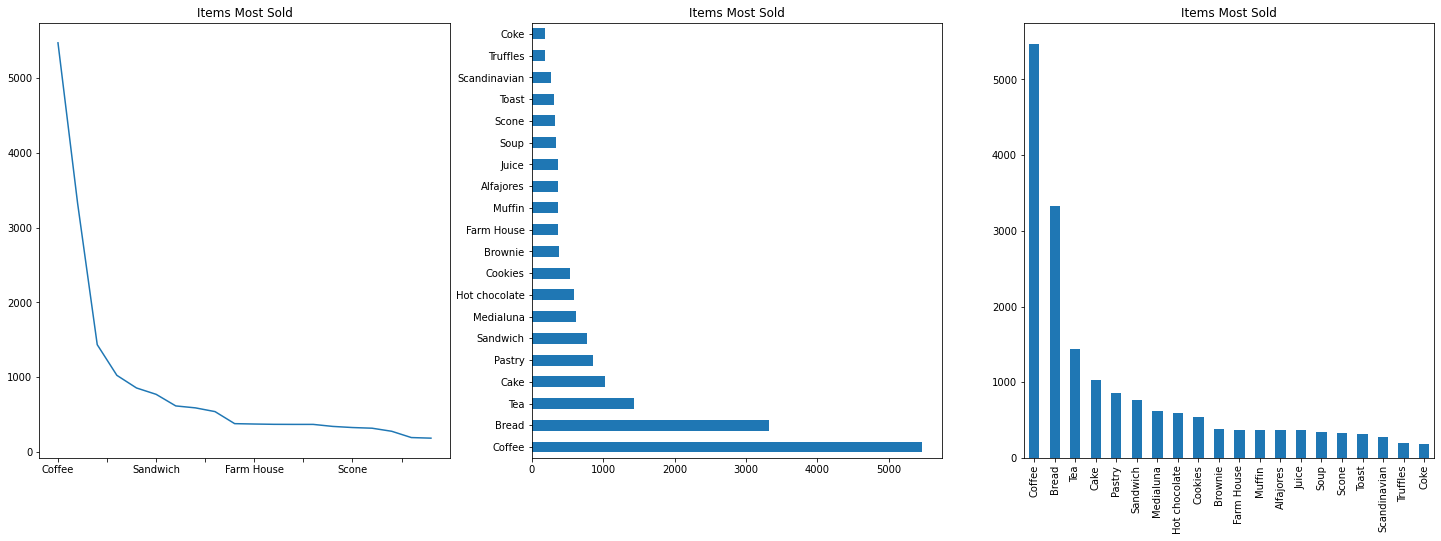

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(25,8))

plt.subplot(1,3,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,3,2)
most_sold.plot(kind='barh')
plt.title('Items Most Sold')

plt.subplot(1,3,3)
most_sold.plot(kind='bar')

plt.title('Items Most Sold')

Berdasarkan hasil visualisasi, kopi adalah barang yang paling banyak terjual, diikuti oleh roti, teh, kue, dan kue kering. Ini masuk akal untuk toko roti. Sekarang setelah kita mengetahui item mana yang paling populer, mari kita lihat bulan mana yang menghasilkan penjualan paling banyak.

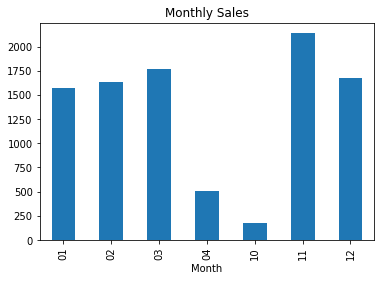

In [ ]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

Dari hasil visualisasi data penjualan perbulan, terlihat terjadi perbedaan penjualan yang drastis pada bulan 4 dan 10 ini disebut dengan outlier.
Untuk mengetahui lebih lanjut, kita bisa periksa untuk melihat apakah ada lebih sedikit transaksi harian yang dicatat untuk bulan-bulan ini dibandingkan dengan yang lain.

In [ ]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


Pada Bulan 4 hanya tercatat 9 hari dan pada bulan  10 hanya tercatat 2 hari

## **5. Market Basket Analysis**

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
df2.shape

(9465, 94)

Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika pendahulunya dibeli.

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
41,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
38,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
9,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
8,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
10,(Tea),(Cake),0.023772,0.166667,1.604781
11,(Cake),(Tea),0.023772,0.228891,1.604781
31,(Coffee),(Toast),0.023666,0.049470,1.472431
30,(Toast),(Coffee),0.023666,0.704403,1.472431
37,(Pastry),"(Bread, Coffee)",0.011199,0.130061,1.444872
36,"(Bread, Coffee)",(Pastry),0.011199,0.124413,1.444872


# **Kesimpulan**

Dapat dilihat dari analisis diatas, di mana semakin tinggi nilai peningkatan, semakin kuat korelasi antar item. Data dengan jelas menunjukkan bahwa kopi adalah konsekuensi populer, yang masuk akal karena itu adalah toko roti. Selain kopi, mari kita lihat korelasi item yang lebih menarik
(format: antecedant(s) -> consequent):


> Kue Kering -> Roti

> Kue -> Teh

> (Kopi + Teh) -> Kue

> Sandwhich -> Teh

> Cokelat Panas -> Kue


Bisnis selalu mencari cara untuk mengoptimalkan pengaturan mereka dan meningkatkan penjualan mereka. Toko roti tidak berbeda, dan analisis semacam ini bisa dilakukan untuk semua jenis toko ritel atau pasar juga. Karena kita sekarang mengetahui korelasi antara item dan kepentingan bersama pelanggan, bisnis dapat membuat keputusan berdasarkan temuan ini. Misalnya, toko roti ini mungkin ingin meletakkan roti yang baru dipanggang di dekat kue kering mereka, karena pelanggan yang membeli kue kering tampaknya juga tertarik dengan roti. Selain penempatan produk, toko roti mungkin juga tertarik untuk mengadakan promosi item gratis, mengingat kemungkinan besar item lain dijual sebagai hasilnya (Misalnya, jika mereka memberikan beberapa roti panggang spesial gratis, itu mungkin tidak hanya menarik pelanggan baru yang sering datang, tetapi juga ada peluang yang sangat bagus bahwa pelanggan masih akan menghabiskan uang untuk kopi).

